# Control del flujo
En programación hablamos de "control de flujo" o estructura de control, a un bloque de código que permite agrupar instrucciones de manera controlada. Principalmente podemos hablar de dos tipos:

* Estructuras de control condicionales
* Estructuras de control iterativas




![](img/crash_course.png)

### Estructuras de control de flujo condicionales
Una sentencia condicional es una instrucción o grupo de instrucciones que se pueden ejecutar o no en función del valor de una condición.

In [ ]:
x = 25

In [ ]:
if x<20:
    print("x es menor que 20")
else: 
    print("x es mayor o igual que 20")

En Python las estructuras de flujo no necesitan llaves o paréntesis si no identación, que no es más que una sangría (https://www.python.org/dev/peps/pep-0008/#indentation)

In [ ]:
if x<20:
    print("x es menor que 20")
    y = 1
elif x<30: 
    print("x es menos que 30 y mayor que 20")
    y = 2
else:
    print("x es mayor o igual que 30")
    y = 3

In [ ]:
y

### Estructuras de control iterativas
Las estructuras iterativas nos permiten ejecutar un mismo código de manera repetida mientras se cumpla una condición.

#### Bucles `for`
Nos permite ejecutar un código de manera repetitiva recorriendo un objeto de tipo secuencial o generador

In [ ]:
for i in range(20):
    if i %2 == 0:
        print("El número {} es par".format(i))

(Hemos usado `range` que es un generado de números)

In [ ]:
ciudades = ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Zaragoza',
            'Málaga', 'Murcia', 'Palma', 'Bilbao', 'Alicante',
            'Córdoba', 'Valladolid', 'Vitoria']

In [ ]:
nuevas = ['INICIO']

In [ ]:
for i in ciudades:
    print("Procesando la ciudad {}".format(i))
    nuevas.append((i,len(i)))

In [ ]:
nuevas

En Python también existe y es especialmente útil las listas por compresión (*List Comprehensions*).

In [ ]:
[i.upper() for i in ciudades]

In [ ]:
[i for i in ciudades if 'b' in i.lower()]

#### Bucle `while`
En bucle de tipo `while` ejecuta código siempre que se cumpla una condición (Hay que tener cuidado en no cometer el error de hacer un bucle infinito)

In [ ]:
anio = 2000

In [ ]:
while anio <= 2017:
    print(anio)
    anio += 1

Tanto en los bucles `for` como en los bucles `while` podemos usar las sentencias `continue` y `break` para iterar o romper el bucle.

In [ ]:
anio = 2000
while anio <= 2017:
    if anio % 2 ==0:
        anio += 1
        continue
    print(anio)
    anio += 1
    
print("\n\nEstamos fuera del bucle")    

In [ ]:
anio = 2000
while anio <= 2017:
    if anio % 2 ==0:
        anio += 1
        continue
    if anio % 13 ==0:
        print("El año {} es divisible por 13.\nTerminamos el bucle :D".format(anio))
        break
    print(anio)
    anio += 1
    
print("\n\nEstamos fuera del bucle")

# Funciones
Las funciones nos ayudan a organizar nuestro código y poder reutilizarlo

In [ ]:
def mi_funcion(x):
    return (x +1) ** 2 

In [ ]:
mi_funcion(2)

In [ ]:
mi_funcion('aaa')

In [ ]:
[mi_funcion(i) for i in range(4)]

La función que definimos puede tener ningún, o varios argumentos y alguno de ellos puede tener valores por defecto.

In [ ]:
def hola_alumnos():
    print("Hola Alumnos!!")

In [ ]:
hola_alumnos()

In [ ]:
def check(x,y=100):
    if x<=y:
        print("{} es menor o igual que {}".format(x,y))
        return True
    return False

In [ ]:
valor = check(10)

In [ ]:
valor

In [ ]:
valor = check(1000)

In [ ]:
valor

In [ ]:
valor = check(1000,1E20)

In [ ]:
valor

# Leer y escribir (I/O)
Veamos como leer y escribir en ficheros, la manera más básica en Python es usando `open`

In [1]:
!head files/coches.txt

'head' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
f = open('files/coches.txt')

In [3]:
type(f)

_io.TextIOWrapper

In [4]:
content = f.readlines()

In [5]:
f.close()

In [ ]:
len(content)

In [ ]:
content[:10]

In [ ]:
[i.strip() for i in content][:10]

En Python la manera más adecuada de hacer lo anterior sería:

In [6]:
with open("files/coches.txt", "r") as f:
    content = f.readlines()

In [7]:
content[-1:-5:-1]

['Volvo 142E\n', 'Maserati Bora\n', 'Ferrari Dino\n', 'Ford Pantera L\n']

En este caso el fichero solo tenía un dato por fila, veamos como tratar con ficheros más complejos (aunque más tarde usaremos librerías específicas para esto)

In [ ]:
!head files/iris.txt

In [ ]:
f = open('files/iris.txt')

In [ ]:
next(f)

In [ ]:
f.close()

In [8]:
with open('files/iris.txt') as f:
    iris = [i.strip().split(" ") for i in f]

In [9]:
iris[:5]

[['5.1', '3.5', '1.4', '0.2', '"setosa"'],
 ['4.9', '3', '1.4', '0.2', '"setosa"'],
 ['4.7', '3.2', '1.3', '0.2', '"setosa"'],
 ['4.6', '3.1', '1.5', '0.2', '"setosa"'],
 ['5', '3.6', '1.4', '0.2', '"setosa"']]

In [10]:
[(
    float(i[0]),
    float(i[1]),
    float(i[2]),
    float(i[3]),
    i[4].replace('"','')
) for i in iris][:5]

[(5.1, 3.5, 1.4, 0.2, 'setosa'),
 (4.9, 3.0, 1.4, 0.2, 'setosa'),
 (4.7, 3.2, 1.3, 0.2, 'setosa'),
 (4.6, 3.1, 1.5, 0.2, 'setosa'),
 (5.0, 3.6, 1.4, 0.2, 'setosa')]

Usando una función:

In [11]:
def parsear_linea(x):
    i = x.strip().split(" ")
    return (
        float(i[0]),
        float(i[1]),
        float(i[2]),
        float(i[3]),
        i[4].replace('"','')
    )

In [12]:
with open('files/iris.txt') as f:
    iris = [parsear_linea(i) for i in f]

In [13]:
iris[:10]

[(5.1, 3.5, 1.4, 0.2, 'setosa'),
 (4.9, 3.0, 1.4, 0.2, 'setosa'),
 (4.7, 3.2, 1.3, 0.2, 'setosa'),
 (4.6, 3.1, 1.5, 0.2, 'setosa'),
 (5.0, 3.6, 1.4, 0.2, 'setosa'),
 (5.4, 3.9, 1.7, 0.4, 'setosa'),
 (4.6, 3.4, 1.4, 0.3, 'setosa'),
 (5.0, 3.4, 1.5, 0.2, 'setosa'),
 (4.4, 2.9, 1.4, 0.2, 'setosa'),
 (4.9, 3.1, 1.5, 0.1, 'setosa')]

#### Ficheros JSON ([*JavaScript Object Notation*](https://es.wikipedia.org/wiki/JSON))

In [16]:
import json

In [ ]:
!head files/imdb.json

In [17]:
with open('files/imdb.json') as f:
    pelis = json.load(f)

In [18]:
pelis

[{'Actors': 'Mark Hamill, Harrison Ford, Carrie Fisher, Peter Cushing',
  'Awards': 'Won 6 Oscars. Another 50 wins & 28 nominations.',
  'BoxOffice': 'N/A',
  'Country': 'USA',
  'DVD': '21 Sep 2004',
  'Director': 'George Lucas',
  'Genre': 'Action, Adventure, Fantasy',
  'Language': 'English',
  'Metascore': '92',
  'Plot': "Luke Skywalker joins forces with a Jedi Knight, a cocky pilot, a Wookiee, and two droids to save the galaxy from the Empire's world-destroying battle-station, while also attempting to rescue Princess Leia from the evil Darth Vader.",
  'Poster': 'https://images-na.ssl-images-amazon.com/images/M/MV5BYTUwNTdiMzMtNThmNS00ODUzLThlMDMtMTM5Y2JkNWJjOGQ2XkEyXkFqcGdeQXVyNzQ1ODk3MTQ@._V1_SX300.jpg',
  'Production': '20th Century Fox',
  'Rated': 'PG',
  'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.7/10'},
   {'Source': 'Rotten Tomatoes', 'Value': '93%'},
   {'Source': 'Metacritic', 'Value': '92/100'}],
  'Released': '25 May 1977',
  'Response': 'True',
  '

In [19]:
type(pelis)

list

In [20]:
len(pelis)

2

In [21]:
type(pelis[1])

dict

In [22]:
peli_1 = pelis[1]

In [23]:
peli_1

{'Actors': 'Felicity Jones, Diego Luna, Alan Tudyk, Donnie Yen',
 'Awards': 'Nominated for 2 Oscars. Another 20 wins & 78 nominations.',
 'BoxOffice': '$532,171,696',
 'Country': 'USA',
 'DVD': '04 Apr 2017',
 'Director': 'Gareth Edwards',
 'Genre': 'Action, Adventure, Sci-Fi',
 'Language': 'English',
 'Metascore': '65',
 'Plot': 'The Rebel Alliance makes a risky move to steal the plans for the Death Star, setting up the epic saga to follow.',
 'Poster': 'https://images-na.ssl-images-amazon.com/images/M/MV5BMjEwMzMxODIzOV5BMl5BanBnXkFtZTgwNzg3OTAzMDI@._V1_SX300.jpg',
 'Production': 'Walt Disney Pictures',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.9/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '85%'},
  {'Source': 'Metacritic', 'Value': '65/100'}],
 'Released': '16 Dec 2016',
 'Response': 'True',
 'Runtime': '133 min',
 'Title': 'Rogue One',
 'Type': 'movie',
 'Website': 'http://www.starwars.com/',
 'Writer': 'Chris Weitz (screenplay), Tony Gilr

In [24]:
peli_1.keys()

dict_keys(['Actors', 'Awards', 'BoxOffice', 'Country', 'DVD', 'Director', 'Genre', 'Language', 'Metascore', 'Plot', 'Poster', 'Production', 'Rated', 'Ratings', 'Released', 'Response', 'Runtime', 'Title', 'Type', 'Website', 'Writer', 'Year', 'imdbID', 'imdbRating', 'imdbVotes'])

In [25]:
print(peli_1.get('Title'))

Rogue One


In [26]:
print(peli_1.get('Poster'))

https://images-na.ssl-images-amazon.com/images/M/MV5BMjEwMzMxODIzOV5BMl5BanBnXkFtZTgwNzg3OTAzMDI@._V1_SX300.jpg


In [27]:
from IPython.display import Image

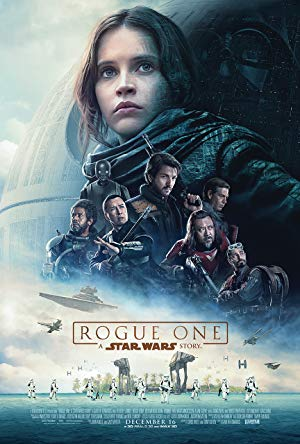

In [28]:
Image(peli_1.get('Poster'))